Description
- 유입경로에 따라서 어떻게 군집이 어떻게 나뉘었는지 파악하기 

# Module Import 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

import warnings
warnings.filterwarnings('ignore')
# from Preprocessing import preprocess

# Data Load

In [32]:
project_df = pd.read_csv('../ml_project1_data.csv')
project_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [33]:
data = pd.read_csv('../with_cluster_df2.csv', index_col=0)
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Response,Accept_all,year,month,day,Mnt_all,Num_all,label
0,5524,0.986443,2,4,0.234063,0,0,2012-09-04,0.310532,0.978226,...,0,0,1,1,2012,9,4,1.675488,1.620547,0
1,2174,1.236801,2,4,-0.234559,1,1,2014-03-08,-0.380509,-0.872024,...,0,0,0,0,2014,3,8,-0.962358,-1.263455,1
2,4141,0.318822,2,3,0.769478,0,0,2013-08-21,-0.795134,0.358511,...,0,0,0,0,2013,8,21,0.280250,0.659213,0
3,6182,-1.266777,2,3,-1.017239,1,0,2014-02-10,-0.795134,-0.872024,...,0,0,0,0,2014,2,10,-0.919224,-0.851455,1
4,5324,-1.016420,4,0,0.240221,1,0,2014-01-19,1.554407,-0.391671,...,0,0,0,0,2014,1,19,-0.307044,0.521879,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10870,0.151917,2,0,0.356642,0,1,2013-06-13,-0.104093,1.197646,...,0,0,0,0,2013,6,13,1.217598,0.384546,0
2212,4001,1.904422,4,3,0.467539,2,1,2014-06-10,0.241428,0.299208,...,0,0,0,1,2014,6,10,-0.270546,1.208546,1
2213,7270,-1.016420,2,6,0.188091,0,0,2014-01-25,1.450751,1.787710,...,0,0,0,2,2014,1,25,1.051696,0.659213,2
2214,8235,1.069896,3,3,0.675388,0,1,2014-01-24,-1.417072,0.364441,...,0,0,0,0,2014,1,24,0.391404,0.796546,0


In [4]:
project_df = pd.read_csv('../ml_project1_data.csv')
project_df = project_df.drop(['Z_CostContact', 'Z_Revenue'], axis=1)
project_df = project_df[project_df['Income'].notna()]
index_li = project_df.index

project_df = project_df.reset_index(drop=True)
project_df['label'] = data['label']
project_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,label
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,4,7,0,0,0,0,0,0,1,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,2,5,0,0,0,0,0,0,0,1
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,10,4,0,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,4,6,0,0,0,0,0,0,0,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,6,5,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,4,5,0,0,0,0,0,0,0,0
2212,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,5,7,0,0,0,1,0,0,0,1
2213,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,13,6,0,1,0,0,0,0,0,2
2214,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,10,3,0,0,0,0,0,0,0,0


In [5]:
# project_df.to_csv('../no_scaling_with_label.csv')

# 분석해야할 feature와 Dataframe 추출

In [6]:
Num_li = []

for col in data.columns:
    if 'Num' in col :
#         print(col)
        Num_li.append(col)
Num_li

['NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Num_all']

In [7]:
## 라벨별 데이터프레임 지정
labels = set(data['label'])

for label in labels :
    globals()['df{}'.format(label)] = data[data['label'] == label].reset_index(drop=True)

In [8]:
## 라벨별 데이터프레임 지정
labels = set(data['label'])

for label in labels :
    globals()['raw{}'.format(label)] = project_df[project_df['label'] == label].reset_index(drop=True)

In [9]:
df0

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Response,Accept_all,year,month,day,Mnt_all,Num_all,label
0,5524,0.986443,2,4,0.234063,0,0,2012-09-04,0.310532,0.978226,...,0,0,1,1,2012,9,4,1.675488,1.620547,0
1,4141,0.318822,2,3,0.769478,0,0,2013-08-21,-0.795134,0.358511,...,0,0,0,0,2013,8,21,0.280250,0.659213,0
2,7446,0.151917,3,3,0.407899,0,1,2013-09-09,-1.140655,0.637234,...,0,0,0,0,2013,9,9,0.180708,1.071213,0
3,2125,0.819538,2,6,0.428560,0,0,2013-11-15,1.139782,-0.329403,...,0,0,0,0,2013,11,15,0.821091,-0.302121,0
4,6565,1.654064,3,0,0.983326,0,1,2013-03-28,1.450751,2.096085,...,0,0,0,1,2013,3,28,1.949227,1.483213,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,4286,-0.098441,4,4,0.214355,0,1,2014-01-09,-0.864239,0.815143,...,0,0,0,1,2014,1,9,0.119325,0.796546,0
642,9817,-0.098441,3,4,-0.295829,0,0,2012-08-21,0.759709,1.624627,...,0,0,0,0,2012,8,21,0.733163,2.032547,0
643,9432,-0.682609,2,3,24.413282,1,0,2013-06-02,-0.898791,-0.877954,...,0,0,0,0,2013,6,2,-0.904293,-0.439455,0
644,10870,0.151917,2,0,0.356642,0,1,2013-06-13,-0.104093,1.197646,...,0,0,0,0,2013,6,13,1.217598,0.384546,0


In [10]:
df1

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Response,Accept_all,year,month,day,Mnt_all,Num_all,label
0,2174,1.236801,2,4,-0.234559,1,1,2014-03-08,-0.380509,-0.872024,...,0,0,0,0,2014,3,8,-0.962358,-1.263455,1
1,6182,-1.266777,2,3,-1.017239,1,0,2014-02-10,-0.795134,-0.872024,...,0,0,0,0,2014,2,10,-0.919224,-0.851455,1
2,5324,-1.016420,4,0,0.240221,1,0,2014-01-19,1.554407,-0.391671,...,0,0,0,0,2014,1,19,-0.307044,0.521879,1
3,965,-0.181894,2,6,0.134609,0,1,2012-11-13,-0.518718,-0.207832,...,0,0,0,0,2012,11,13,-0.028328,0.933880,1
4,6177,-1.350230,4,0,-0.746730,1,0,2013-05-08,-0.587822,-0.679290,...,0,0,0,0,2013,5,8,-0.726777,-0.302121,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350,7004,-1.266777,2,4,-1.638439,1,0,2013-03-16,1.139782,-0.833477,...,0,0,0,1,2013,3,16,-0.867794,-0.302121,1
1351,8080,-1.433683,2,4,-1.010484,0,0,2012-08-17,0.034115,-0.889815,...,0,0,0,0,2012,8,17,-0.970653,-1.675455,1
1352,8372,-0.432251,2,0,-0.708307,1,0,2013-07-01,1.105230,-0.895745,...,0,0,0,0,2013,7,1,-0.957381,-1.263455,1
1353,4001,1.904422,4,3,0.467539,2,1,2014-06-10,0.241428,0.299208,...,0,0,0,1,2014,6,10,-0.270546,1.208546,1


In [11]:
df2

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Response,Accept_all,year,month,day,Mnt_all,Num_all,label
0,2114,1.904422,4,4,1.213981,0,0,2012-11-24,-0.898791,2.078294,...,0,0,1,2,2012,11,24,1.174463,1.208546,2
1,1993,1.654064,4,0,0.252698,0,1,2012-12-23,0.483293,1.666139,...,0,0,0,2,2012,12,23,0.605418,0.659213,2
2,2968,2.154779,4,6,-0.131092,0,0,2013-02-01,0.137772,0.391127,...,0,0,1,2,2013,2,1,0.489287,1.345880,2
3,2225,-0.682609,2,6,1.205319,0,0,2014-06-07,0.172324,0.607583,...,0,0,1,3,2014,6,7,1.675488,0.247213,2
4,6853,-1.099872,3,4,0.934930,0,0,2013-07-04,-1.278863,1.206542,...,0,0,1,3,2013,7,4,1.378523,0.247213,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,2666,-0.265346,3,0,0.953088,0,1,2014-02-06,-0.967895,0.634269,...,0,0,0,2,2014,2,6,0.497582,0.796546,2
211,8722,0.986443,0,0,1.195982,0,0,2012-11-06,-0.380509,0.743979,...,0,0,1,3,2012,11,6,2.067018,1.071213,2
212,7118,0.986443,2,0,0.856495,0,1,2012-08-01,0.414188,1.565324,...,0,0,1,2,2012,8,1,1.527835,1.071213,2
213,7366,-1.099872,3,4,0.934930,0,0,2013-07-04,-1.278863,1.206542,...,0,0,1,3,2013,7,4,1.378523,0.247213,2


In [12]:
raw0

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,label
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,4,7,0,0,0,0,0,0,1,0
1,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,10,4,0,0,0,0,0,0,0,0
2,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,10,6,0,0,0,0,0,0,0,0
3,2125,1959,Graduation,Divorced,63033.0,0,0,2013-11-15,82,194,...,8,2,0,0,0,0,0,0,0,0
4,6565,1949,Master,Married,76995.0,0,1,2013-03-28,91,1012,...,9,5,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,4286,1970,PhD,Single,57642.0,0,1,2014-01-09,24,580,...,6,4,1,0,0,0,0,0,0,0
642,9817,1970,Master,Single,44802.0,0,0,2012-08-21,71,853,...,12,8,0,0,0,0,0,0,0,0
643,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,3,6,0,0,0,0,0,0,0,0
644,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,4,5,0,0,0,0,0,0,0,0


In [13]:
raw1

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,label
0,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,2,5,0,0,0,0,0,0,0,1
1,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,4,6,0,0,0,0,0,0,0,1
2,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,6,5,0,0,0,0,0,0,0,1
3,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,7,6,0,0,0,0,0,0,0,1
4,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,4,8,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350,7004,1984,Graduation,Single,11012.0,1,0,2013-03-16,82,24,...,2,9,1,0,0,0,0,0,0,1
1351,8080,1986,Graduation,Single,26816.0,0,0,2012-08-17,50,5,...,3,4,0,0,0,0,0,0,0,1
1352,8372,1974,Graduation,Married,34421.0,1,0,2013-07-01,81,3,...,2,7,0,0,0,0,0,0,0,1
1353,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,5,7,0,0,0,1,0,0,0,1


In [14]:
raw2

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,label
0,2114,1946,PhD,Single,82800.0,0,0,2012-11-24,23,1006,...,12,3,0,0,1,1,0,0,1,2
1,1993,1949,PhD,Married,58607.0,0,1,2012-12-23,63,867,...,9,8,0,1,0,0,0,0,0,2
2,2968,1943,PhD,Divorced,48948.0,0,0,2013-02-01,53,437,...,5,6,1,0,0,0,0,0,1,2
3,2225,1977,Graduation,Divorced,82582.0,0,0,2014-06-07,54,510,...,7,1,1,0,0,1,0,0,1,2
4,6853,1982,Master,Single,75777.0,0,0,2013-07-04,12,712,...,11,1,0,1,1,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,2666,1972,Master,Married,76234.0,0,1,2014-02-06,21,519,...,11,3,0,1,0,0,0,0,0,2
211,8722,1957,2n Cycle,Married,82347.0,0,0,2012-11-06,38,556,...,10,3,1,0,0,1,0,0,1,2
212,7118,1957,Graduation,Married,73803.0,0,1,2012-08-01,61,833,...,6,6,1,0,0,0,0,0,1,2
213,7366,1982,Master,Single,75777.0,0,0,2013-07-04,12,712,...,11,1,0,1,1,0,0,0,1,2


# 분석
- 'NumDealsPurchases' : 할인이 있을때만 구매하는 고객의 수
- 'NumWebPurchases' : 웹사이트를 통해서 구매하는 고객의 수
- 'NumCatalogPurchases' : 카탈로그를 이용해서 구매하는 고객의 수 
- 'NumStorePurchases' : 매장에서 직접 구매하는 고객의 수 
- 'NumWebVisitsMonth' : 저번달에 회사 웹사이트에서 구매한 고객의 수 
- 'Num_all' : 전부 합침

- 0번 군집 개수 : 646
- 1번 군집 개수 : 1355
- 2번 군집 개수 : 215

## Num_li compare

In [15]:
def compare_nums(num_feature:str) :
    fig = plt.figure(figsize=(15,6))
    axs = fig.subplots(1,3).flatten()

    num_df = pd.DataFrame()
    for ind, raw_df in enumerate([raw0,raw1,raw2]):
        num_ = raw_df[num_feature].value_counts().sort_index()
        num_df['raw{}'.format(ind)] = num_
        num_ = num_/len(raw_df) * 100
        num_df['100_raw{}'.format(ind)] = num_
        num_.plot(kind="bar",color='orange', ax=axs[ind])
        axs[ind].set_title('cluster{}'.format(ind))
    
    maxval = num_df[['100_raw0','100_raw1','100_raw2']].max(axis=0).max()
    
    axs[0].set_ylim(0, maxval+5)
    axs[1].set_ylim(0, maxval+5)
    axs[2].set_ylim(0, maxval+5)
    

    fig.suptitle('{}'.format(num_feature))
    fig.tight_layout()
    return num_df

,raw0,raw1,raw2
0,19,8.0,17.0
1,356,492.0,112.0
2,107,362.0,24.0
3,62,208.0,23.0
4,46,124.0,18.0
5,24,63.0,7.0
6,9,46.0,5.0
7,8,27.0,4.0
8,3,10.0,1.0
9,1,6.0,1.0


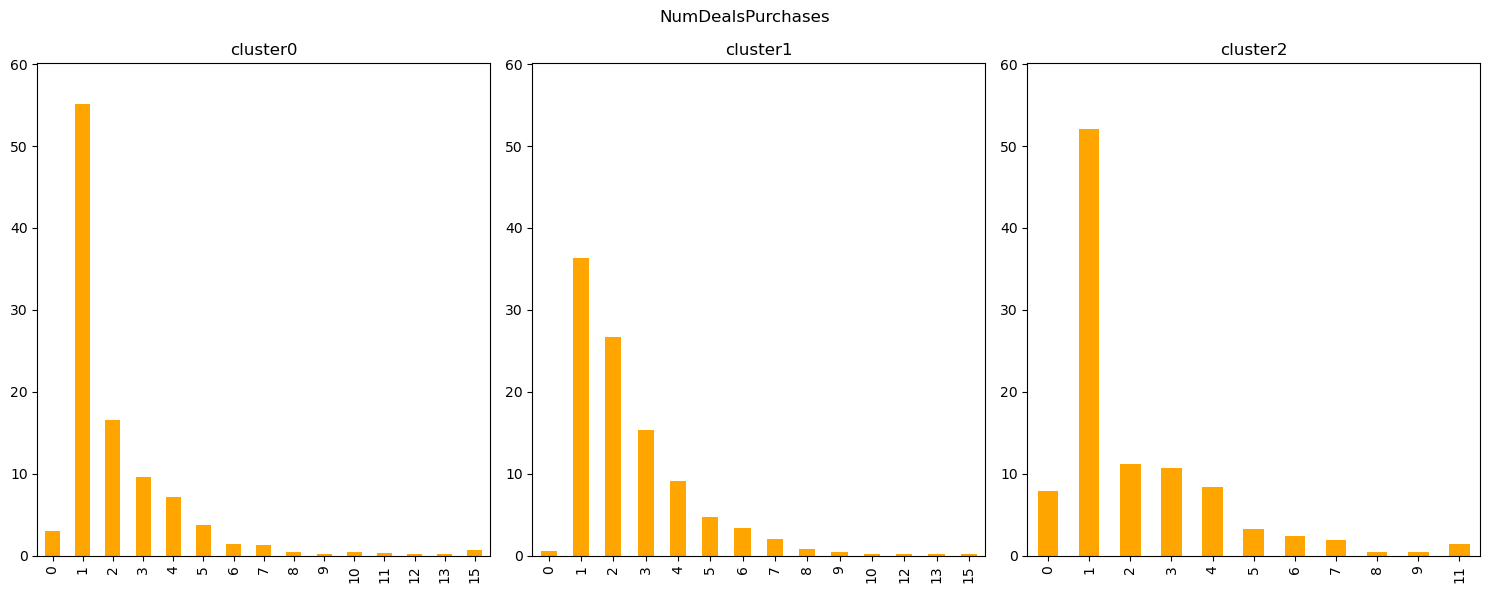

In [38]:
compare_nums('NumDealsPurchases')[['raw0','raw1','raw2']].fillna(0)

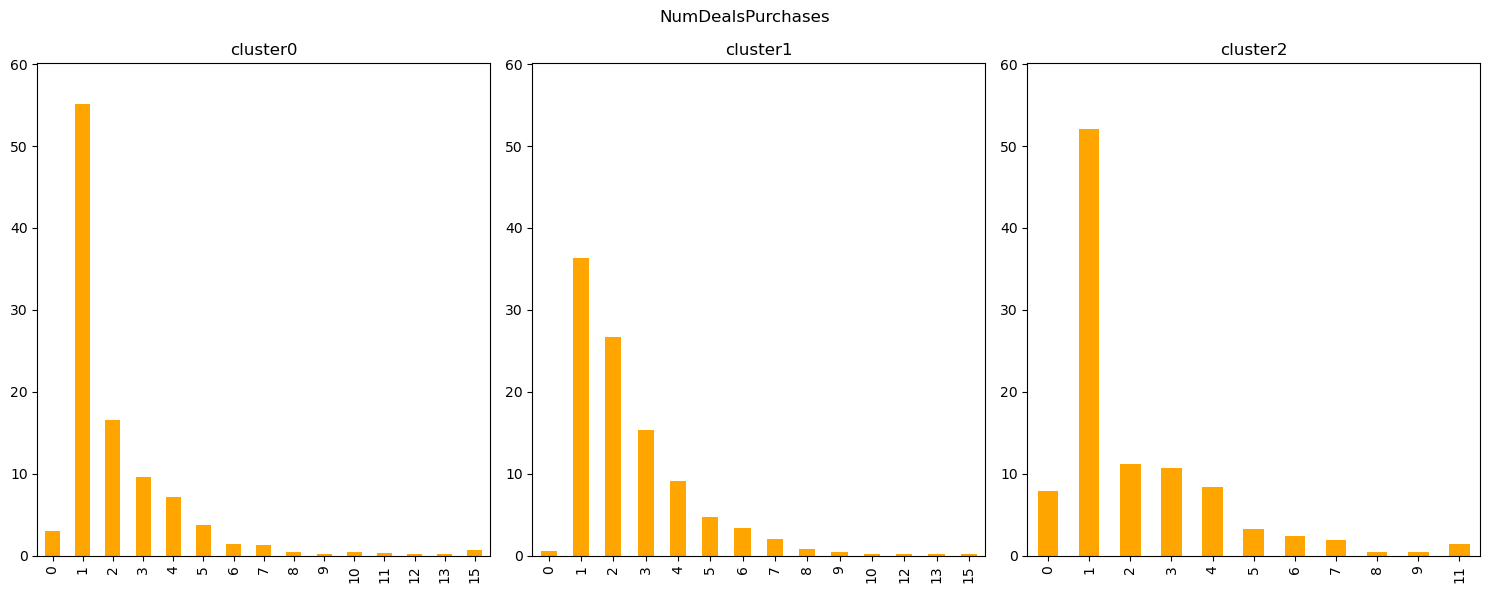

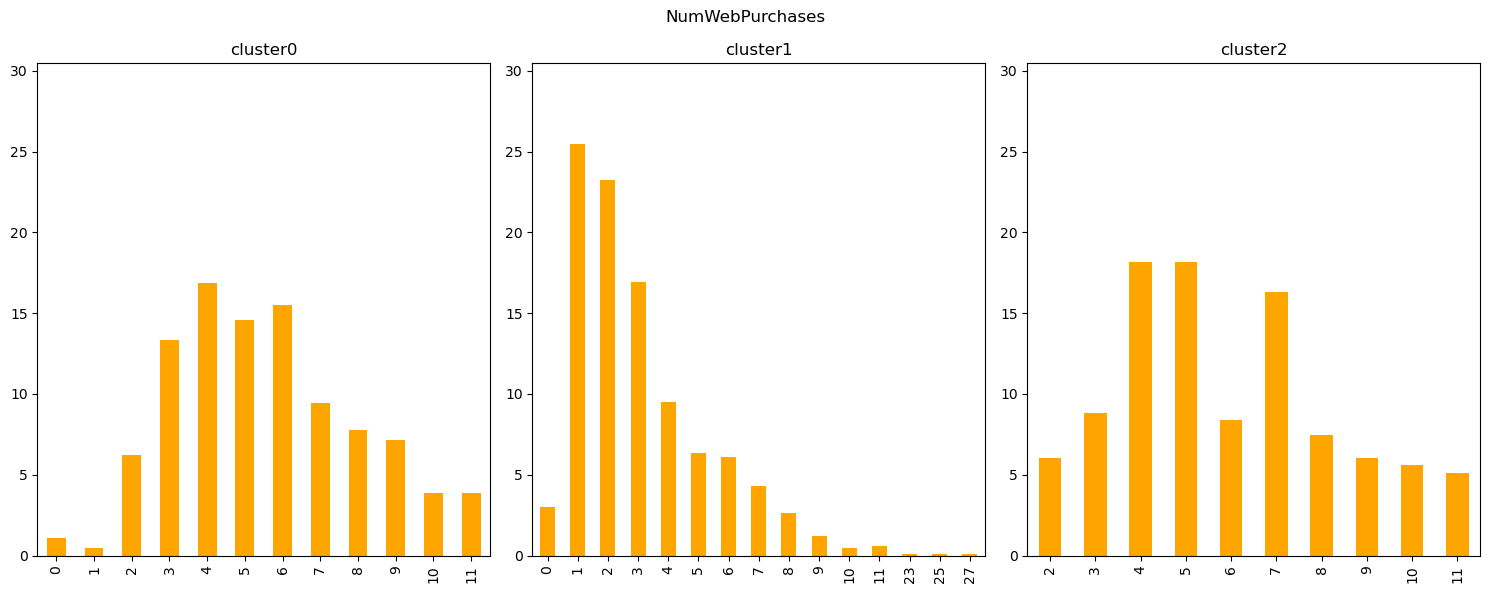

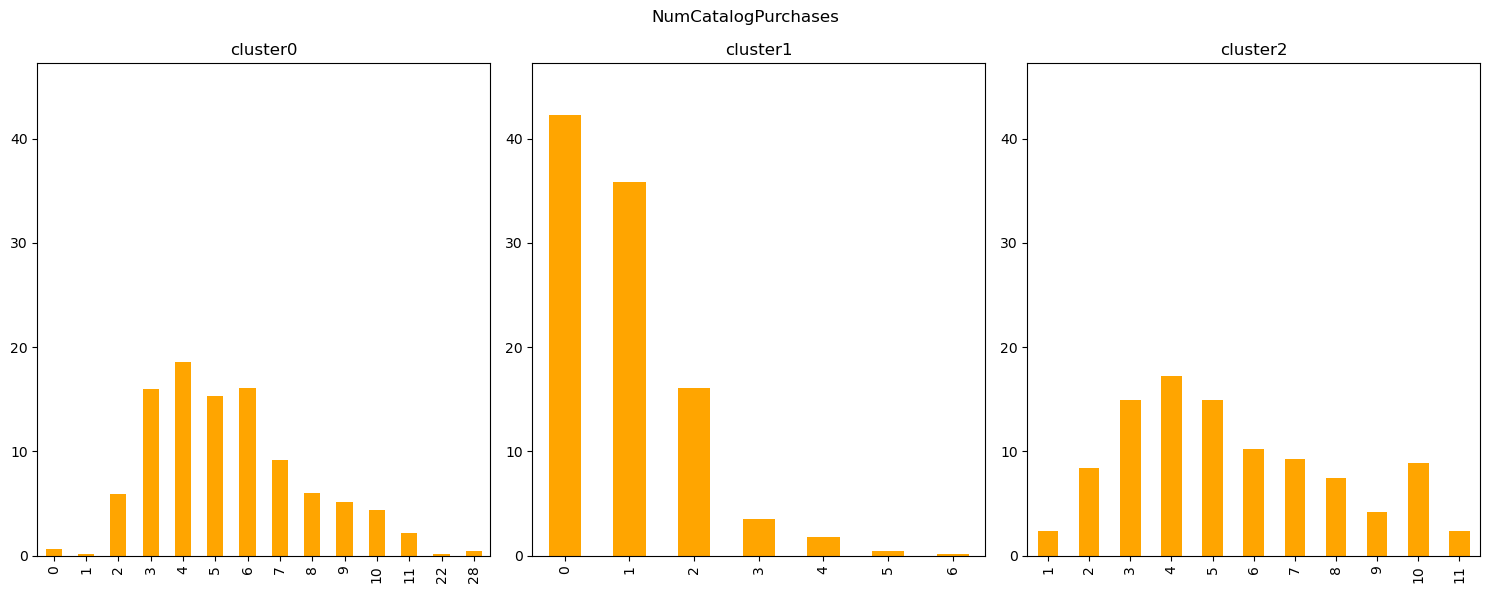

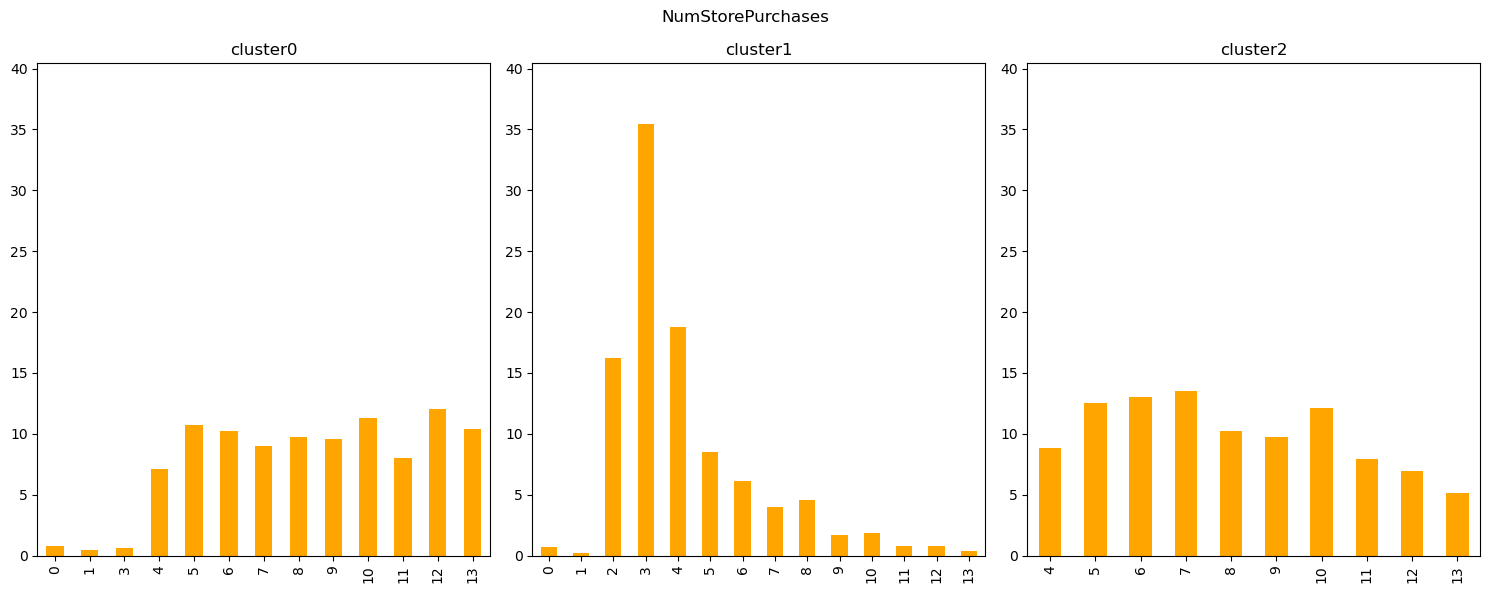

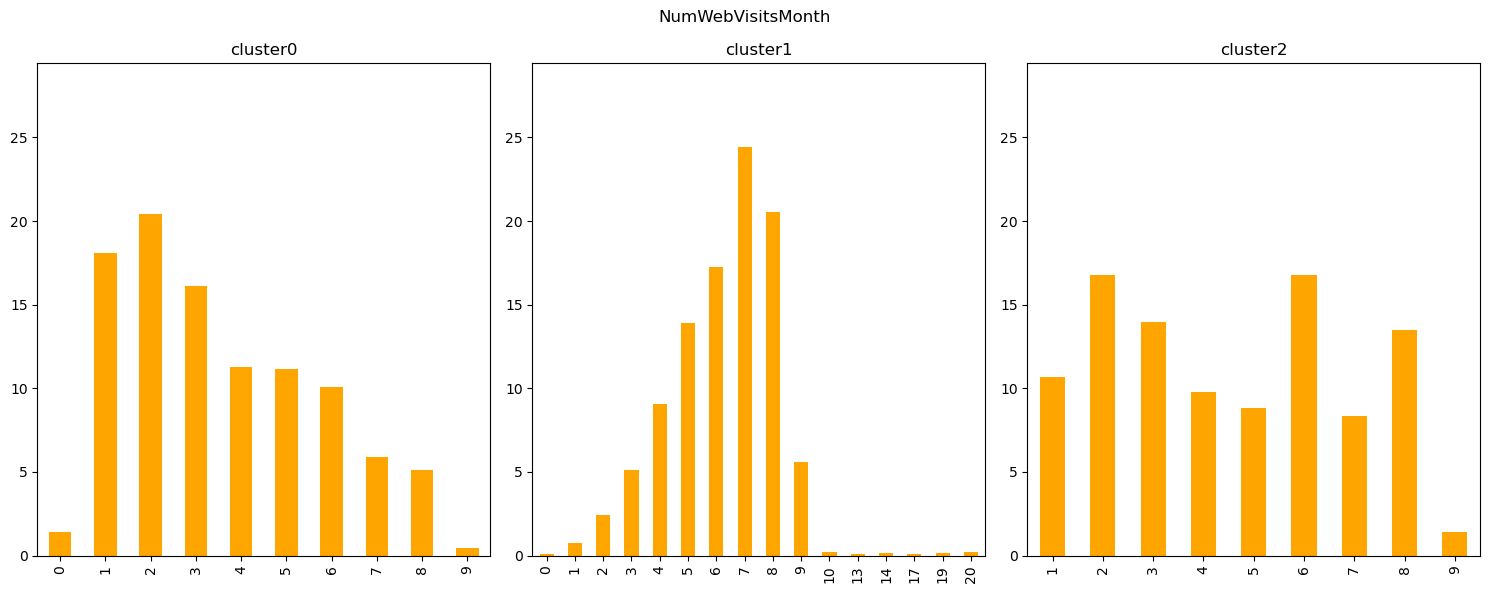

In [16]:
for col in Num_li[:-1]:
    compare_nums(col)


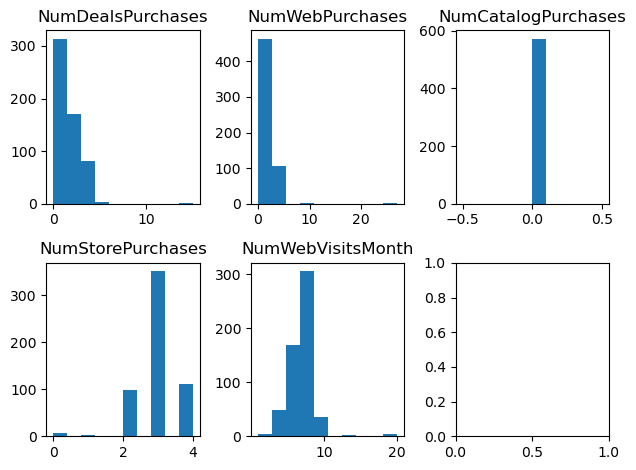

In [26]:
a = raw1[raw1['NumCatalogPurchases'] == 0][['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]
numfeatures = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

fig = plt.figure()
axs = fig.subplots(2, 3).flatten()

for ind,feature in enumerate(numfeatures) :
    axs[ind].hist(a[feature])
    axs[ind].set_title('{}'.format(feature))
fig.tight_layout()






In [18]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Accept_all', 'year', 'month',
       'day', 'Mnt_all', 'Num_all', 'label'],
      dtype='object')

## Recency Compare

In [19]:
def make_recency_3(x):
    if x < 20 :
        return int(0)
    elif x < 40 :
        return int(1)
    elif x < 60 :
        return int(2)
    elif x < 80 :
        return int(3)
    else :
        return int(4)
    



raw0['Recency'].apply(make_recency_3).value_counts()



3    138
4    132
2    131
1    127
0    118
Name: Recency, dtype: int64

In [20]:
for ind, df in enumerate([raw0,raw1,raw2]) :
    print('###### raw{} ########'.format(ind))
    print(df['Recency'].apply(make_recency_3).value_counts())
    print('\n')
    

###### raw0 ########
3    138
4    132
2    131
1    127
0    118
Name: Recency, dtype: int64


###### raw1 ########
0    280
1    278
2    275
4    270
3    252
Name: Recency, dtype: int64


###### raw2 ########
0    54
3    44
1    42
2    39
4    36
Name: Recency, dtype: int64




## 해석

클러스터당 해석
0 : 646
1 : 1355
2 : 215

NumDealsPurchases 
- 할인할때 1번 구매하는 고객이 군집1에서 상대적으로 낮다.

NumWebPurchases
- 웹을 통해 구매하는 고객들이 군집에서 1,2번이 상대적으로 높고, 높은 횟수들은 다른 군집에서 높다.

NumCatologPurchases
- 카탈로그로 보고 온 고객들
- 군집1에서 1번 산 사람들이  가장 많다.
- 군집 0,2에서 높은 횟수들의 비율이 군집1보다 높다.

NumStorePurchases
- 매장으로 직접 온사람들의 비율
- 군집1에서 3회가 압도적으로 높다. (무슨 일이 있었을수도..)
- 군집 0,2는 적은 횟수는 없고, 4회 이상에서 일정한 비율로 나타남.

NumWebVisitsMonth
- 저번달에 구매한 고객들의 비율
- 군집1은 저번달에 1회수에서 8회까지 점점 높아져간다. 
- 군집0은 점점 내려간다.
- 군집2는 특징이 없다.


Recency(매장에 마지막으로 온날이 얼마나 지났는지) : 0~100을 0~4로 나눔.

군집0
- 3이 가장 많음. : 매장에 온지 오래된 고객들이 많음

군집1
- 0이 가장 많음. : 매장에 온지 얼마 안된 사람들이 많음

군집2
- 0이 가장많음. 
그 밑ㅇ 것들은 특징을 보이진 않음.


















 

In [26]:
project_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'label'],
      dtype='object')

## Marital_Status

In [44]:
list(raw0['Marital_Status'].value_counts().index)


['Married', 'Together', 'Single', 'Divorced', 'Widow', 'Absurd']

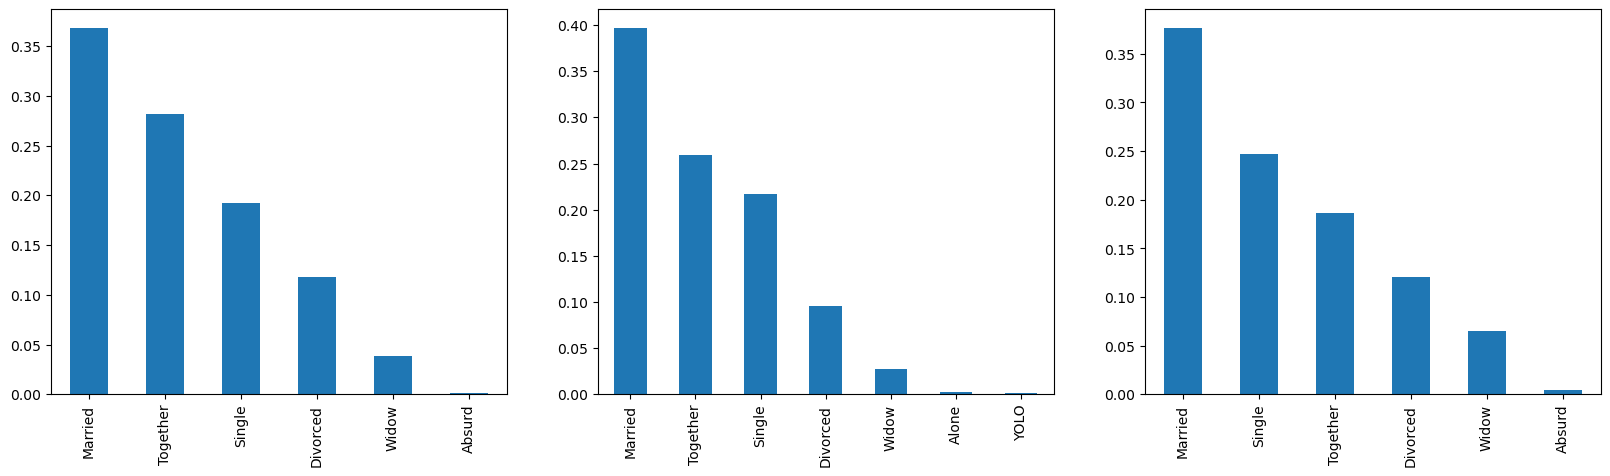

In [48]:
fig = plt.figure(figsize=(20,5))
axs = fig.subplots(1,3)

for ind, df in enumerate([raw0,raw1,raw2]) :

    a = df['Marital_Status'].value_counts()/len(df)
    a.plot(kind='bar',ax=axs[ind])


In [70]:
set(project_df['Education'])

{'2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD'}

<AxesSubplot:>

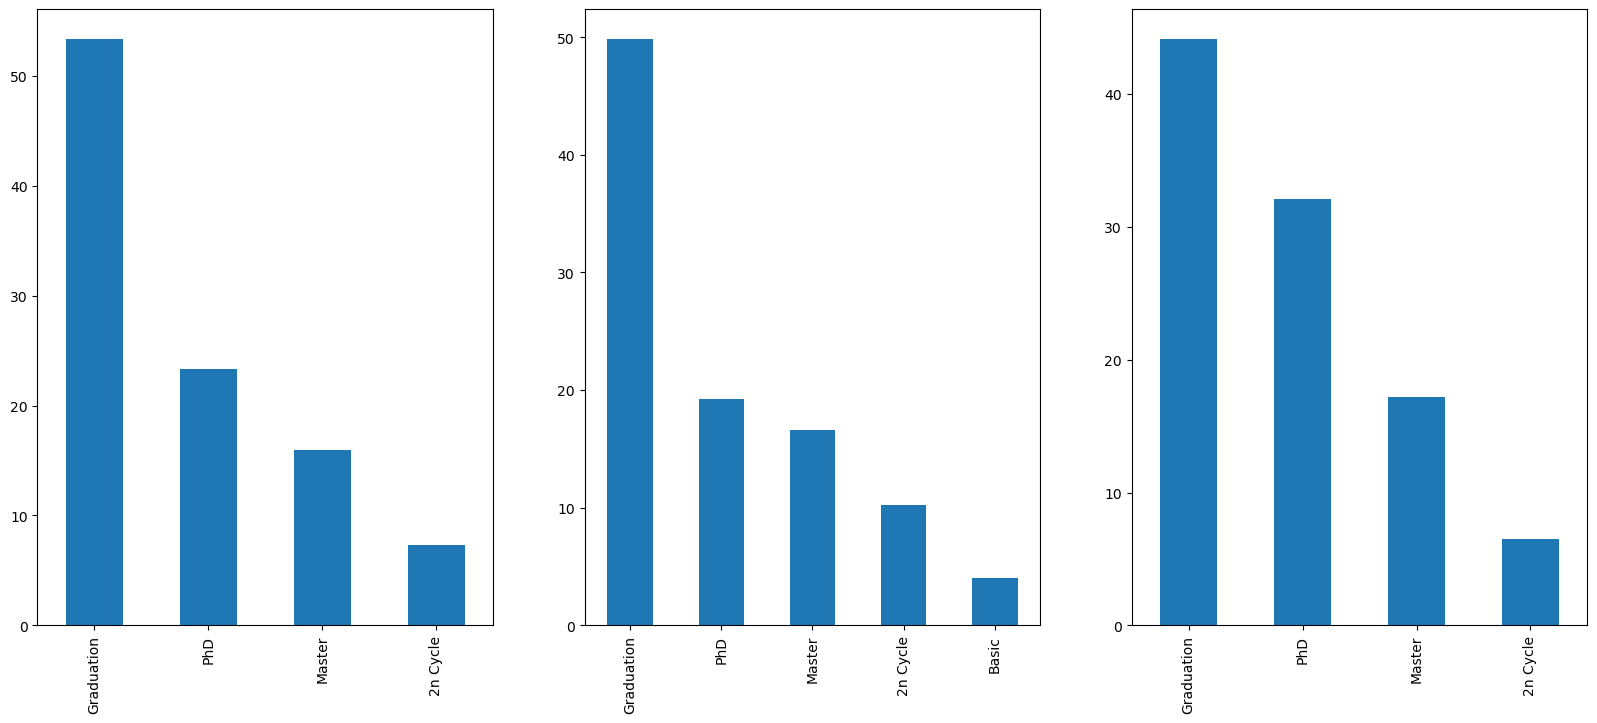

In [68]:
fig = plt.figure(figsize=(20,8))
axs = fig.subplots(1,3).flatten()

a= raw0['Education'].value_counts()/len(raw0)*100
a.plot(kind='bar',ax=axs[0])
a= raw1['Education'].value_counts()/len(raw1)*100
a.plot(kind='bar',ax=axs[1])
a= raw2['Education'].value_counts()/len(raw2)*100
a.plot(kind='bar',ax=axs[2])


In [83]:
raw0['Dt_Customer'].str.split('-').str.get(1).value_counts()/len(raw0)*100

05    10.371517
11    10.216718
08     9.907121
09     9.597523
01     8.978328
10     8.204334
04     8.049536
02     7.894737
06     7.894737
12     7.585139
03     7.430341
07     3.869969
Name: Dt_Customer, dtype: float64

In [84]:
raw1['Dt_Customer'].str.split('-').str.get(1).value_counts()/len(raw1)*100

03    10.036900
10     9.741697
08     9.741697
05     9.594096
01     8.634686
04     8.634686
12     8.413284
09     8.191882
02     7.749077
06     7.453875
11     6.863469
07     4.944649
Name: Dt_Customer, dtype: float64

In [85]:
raw2['Dt_Customer'].str.split('-').str.get(1).value_counts()/len(raw2)*100

03    11.627907
10    11.627907
11    11.162791
08    10.697674
02     9.767442
01     9.302326
09     8.372093
05     7.441860
12     5.581395
04     5.581395
06     5.116279
07     3.720930
Name: Dt_Customer, dtype: float64

(array([53.,  0., 81.,  0., 26.,  0., 40.,  0., 14.,  1.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

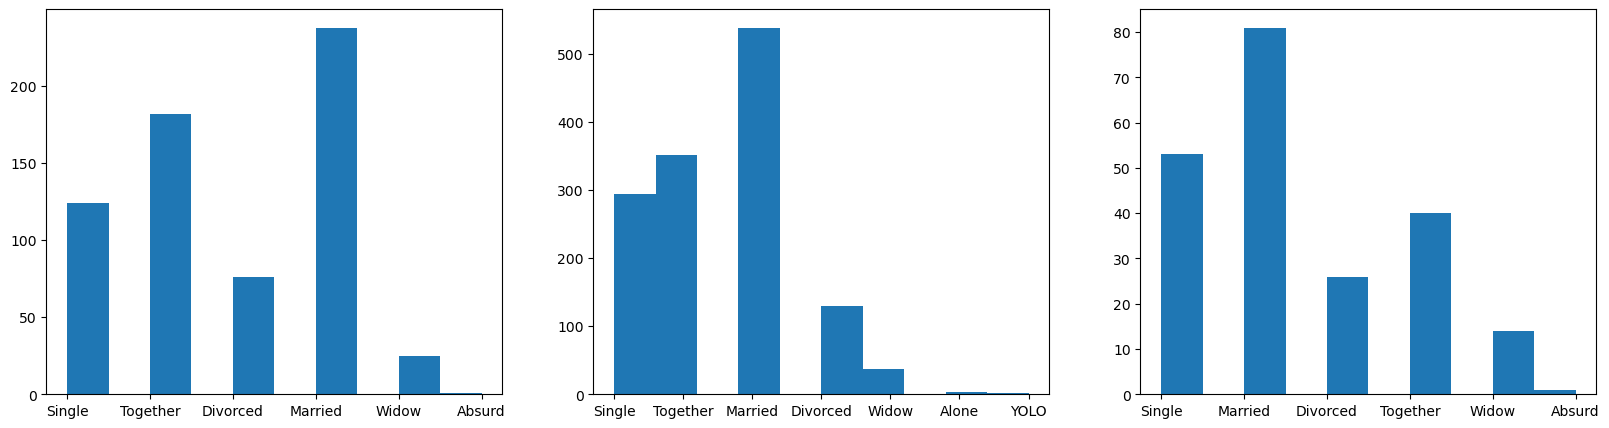

In [38]:
fig = plt.figure(figsize=(20,5))
axs = fig.subplots(1,3)
axs[0].hist(raw0['Marital_Status'])
axs[1].hist(raw1['Marital_Status'])
axs[2].hist(raw2['Marital_Status'])

## 이벤트별로 mnt구하기

In [40]:
project_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [41]:
accept = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2']
mnt = ['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']

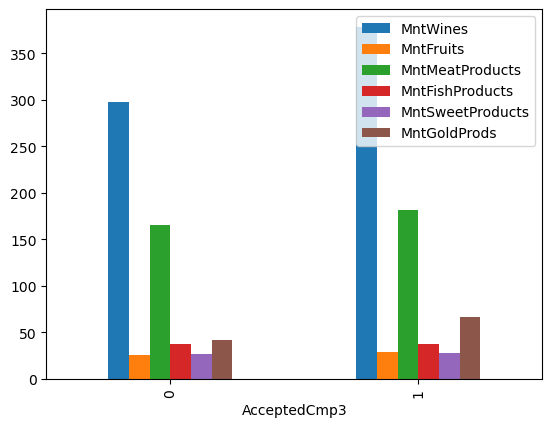

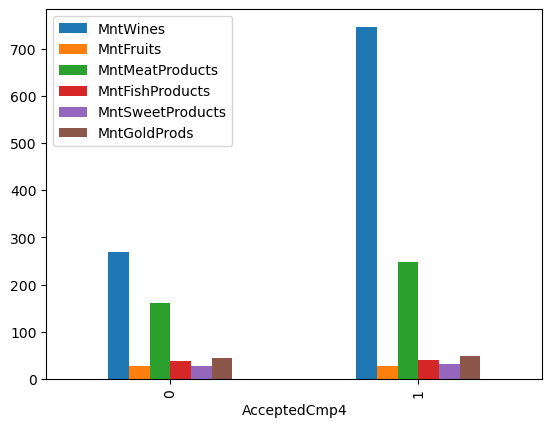

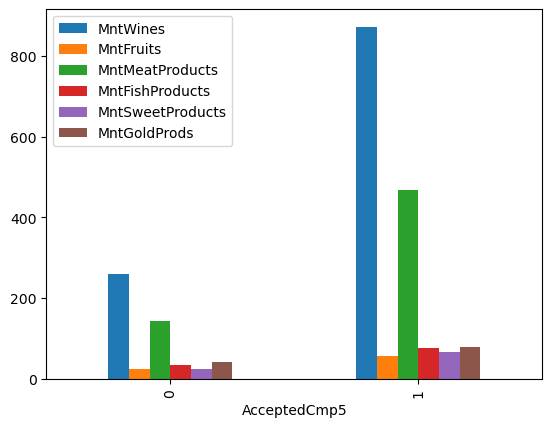

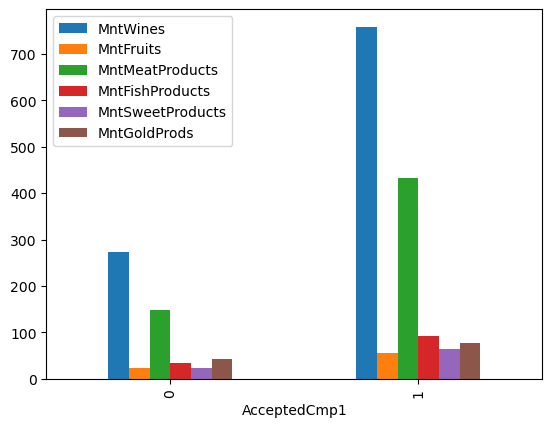

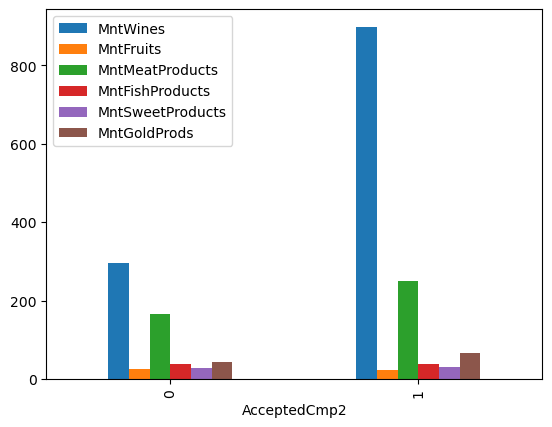

In [50]:
df = project_df[accept + mnt]

for acc in accept :
    a = df.groupby(acc).mean()[mnt]
    a.plot(kind='bar')
#     print(a)